In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns

In [8]:
#Extract the smiley_dataset.zip file
import zipfile
with zipfile.ZipFile('smiley_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('smiley_dataset')

# Part 1. Data Analysis and Bayes Nets

In [123]:
# Load the dataset
X = np.load('smiley_dataset/smiley_dataset/smiley_X.npy')
y = np.load('smiley_dataset/smiley_dataset/smiley_Y.npy')

# Print the shape of the dataset
print(X.shape)

# Remove the last dimension of the dataset
X = np.squeeze(X)
print(X.shape)


(204, 9, 9, 1)
(204, 9, 9)


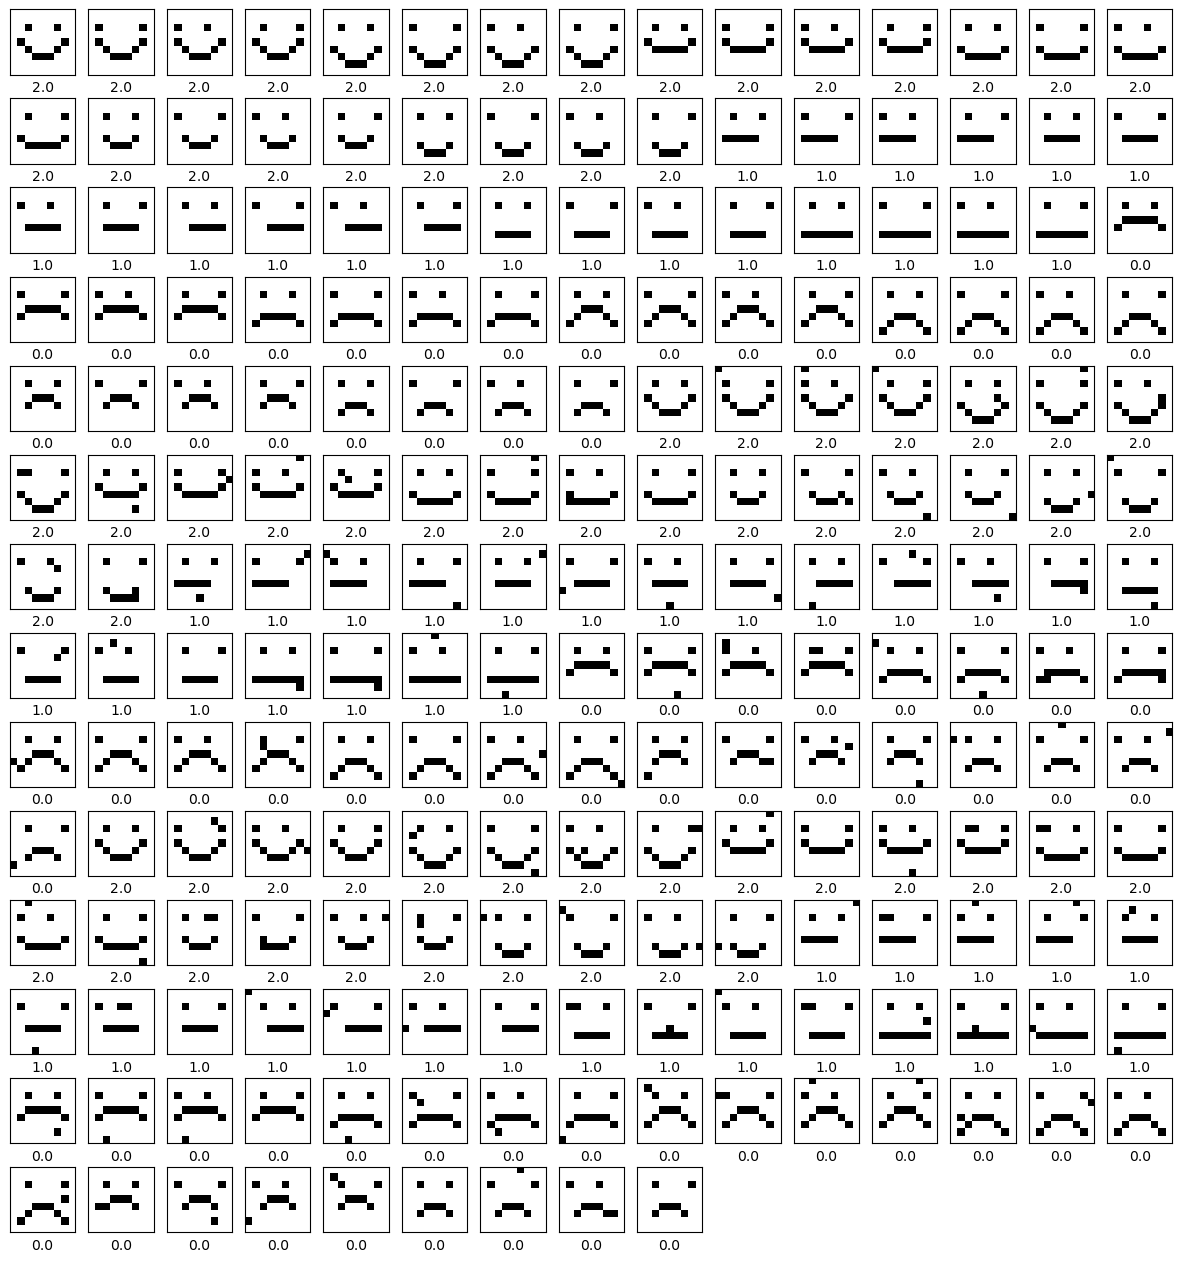

In [124]:
# Calculate the number of rows and columns needed for the grid using the square root of the length of the dataset. 
# We then add 1 to the number of columns to ensure that all images are displayed.
num_rows = int(len(X) ** 0.5)
num_cols = int(len(X) / num_rows) + 1

# Plot the images
plt.figure(figsize=(15, 16))
for i in range(len(X)):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [125]:
# Flatten the images
X = X.reshape(len(X), -1)
print(X.shape)
print(y.shape)

(204, 81)
(204,)


In [126]:
df = pd.DataFrame(
    data=X,
    columns=['pixels_'+str(i+1) for i in range(X.shape[1])])

# Append labels-column:
df['labels'] = y

df.head()

,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,pixels_10,...,pixels_73,pixels_74,pixels_75,pixels_76,pixels_77,pixels_78,pixels_79,pixels_80,pixels_81,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [127]:
df.describe()

,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,pixels_10,...,pixels_73,pixels_74,pixels_75,pixels_76,pixels_77,pixels_78,pixels_79,pixels_80,pixels_81,labels
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.024510,0.004902,0.009804,0.004902,0.009804,0.004902,0.009804,0.019608,0.004902,0.014706,...,0.004902,0.004902,0.014706,0.014706,0.009804,0.009804,0.009804,0.019608,0.009804,1.000000
std,0.155006,0.070014,0.098771,0.070014,0.098771,0.070014,0.098771,0.138989,0.070014,0.120669,...,0.070014,0.070014,0.120669,0.120669,0.098771,0.098771,0.098771,0.138989,0.098771,0.842235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [128]:
df['labels'].value_counts()

labels
2.0    72
0.0    72
1.0    60
Name: count, dtype: int64

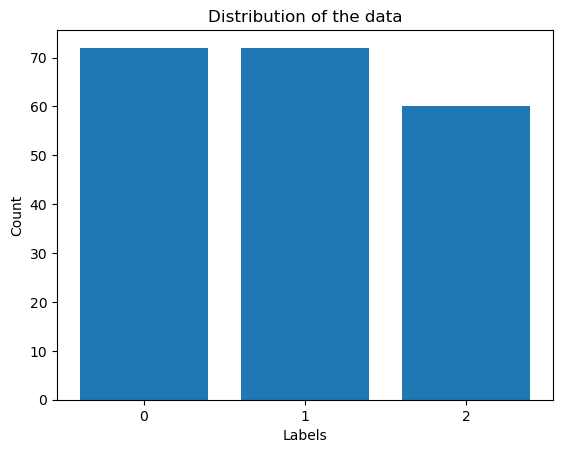

In [129]:
# Plot distribution of the data

value_counts_array = df['labels'].value_counts().to_numpy()

# get number of unique labels
unique_labels = df['labels'].unique()

plt.figure()
plt.bar(range(0, len(unique_labels)), value_counts_array)
plt.xticks(range(0, len(unique_labels)))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of the data')
plt.show()



In [130]:
df.info()

# There are no missing values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 82 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixels_1   204 non-null    float64
 1   pixels_2   204 non-null    float64
 2   pixels_3   204 non-null    float64
 3   pixels_4   204 non-null    float64
 4   pixels_5   204 non-null    float64
 5   pixels_6   204 non-null    float64
 6   pixels_7   204 non-null    float64
 7   pixels_8   204 non-null    float64
 8   pixels_9   204 non-null    float64
 9   pixels_10  204 non-null    float64
 10  pixels_11  204 non-null    float64
 11  pixels_12  204 non-null    float64
 12  pixels_13  204 non-null    float64
 13  pixels_14  204 non-null    float64
 14  pixels_15  204 non-null    float64
 15  pixels_16  204 non-null    float64
 16  pixels_17  204 non-null    float64
 17  pixels_18  204 non-null    float64
 18  pixels_19  204 non-null    float64
 19  pixels_20  204 non-null    float64
 20  pixels_21 

In [16]:
# df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [131]:
# Use Naive Bayes Classifier

X_train, X_test, y_train, y_test = train_test_split(df.drop('labels', axis=1), df['labels'], test_size=0.2, random_state=42)

# Train the model
model = GaussianNB()
fit_model = model.fit(X_train, y_train)

# Predict the labels
y_pred = fit_model.predict(X_test)


[[10  4  1]
 [ 1  6  2]
 [ 0  6 11]]


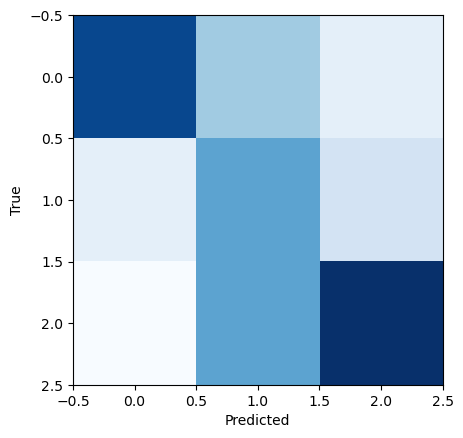

In [133]:
# Use confusion matrix to evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.show()

In [134]:
# Metrics

def getMetrics(conf_matrix=conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = 2 * (Precision * Recall) / (Precision + Recall)
    Accuracy = (TP+TN)/(TP+FP+FN+TN)

    print('True Positive Rate: ', TPR)
    print('True Negative Rate: ', TNR)
    print('Precision: ', Precision)
    print('Recall: ', Recall)
    print('F1 Score: ', F1)
    print('Accuracy: ', Accuracy)

    return TPR, TNR, FPR, Precision, Recall, F1, Accuracy

TPR, TNR, FPR, Precision, Recall, F1, Accuracy = getMetrics()

True Positive Rate:  [0.66666667 0.66666667 0.64705882]
True Negative Rate:  [0.96153846 0.6875     0.875     ]
Precision:  [0.90909091 0.375      0.78571429]
Recall:  [0.66666667 0.66666667 0.64705882]
F1 Score:  [0.76923077 0.48       0.70967742]
Accuracy:  [0.85365854 0.68292683 0.7804878 ]


In [135]:
# Metrics

print(metrics.classification_report(y_test, y_pred))

# ROC Curve

y_score = fit_model.predict_proba(X_test)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)


              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.38      0.67      0.48         9
         2.0       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



(41, 3)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
import seaborn as sns
from itertools import cycle


# Compute ROC curve and ROC area for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
Y_test_bin = label_binarize(y_test, classes=np.unique(y))
Y_pred_bin = label_binarize(y_pred, classes=np.unique(y))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), Y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Store the results
results = {
    'roc_curve': {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }
}

results


/var/folders/dz/mxd_lfd57j52jjcpfvpdn6qc0000gn/T/ipykernel_8196/3636331816.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


{'roc_curve': {'fpr': {0: array([0.        , 0.03846154, 1.        ]),
   1: array([0.    , 0.3125, 1.    ]),
   2: array([0.   , 0.125, 1.   ]),
   'micro': array([0.        , 0.17073171, 1.        ]),
   'macro': array([0.        , 0.03846154, 0.125     , 0.3125    , 1.        ])},
  'tpr': {0: array([0.        , 0.66666667, 1.        ]),
   1: array([0.        , 0.66666667, 1.        ]),
   2: array([0.        , 0.64705882, 1.        ]),
   'micro': array([0.        , 0.65853659, 1.        ]),
   'macro': array([0.        , 0.31593766, 0.53679739, 0.71700747, 1.        ])},
  'roc_auc': {0: 0.814102564102564,
   1: 0.6770833333333333,
   2: 0.7610294117647058,
   'micro': 0.7439024390243902,
   'macro': 0.750738436400201}}}

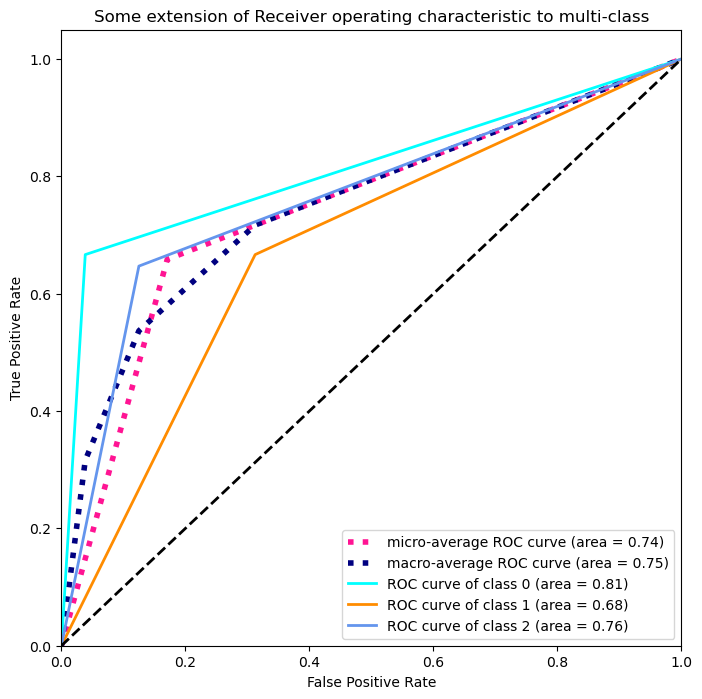

In [137]:
# Plot all ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [21]:
# Correlation Matrix

# f, ax = plt.subplots(figsize=(20, 16))
# corr = df.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
#             cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

In [22]:
# General correlation matrix
corr = df.corr()
corr_sorted = corr['labels'].sort_values(ascending=False)
# corr_sorted.head(30)

# Sort the values absoulte values of the correlation matrix
corr_abs = corr.abs()
corr_abs_sorted = corr_abs['labels'].sort_values(ascending=False)
corr_abs_sorted.head(30)


labels       1.000000
pixels_40    0.550973
pixels_41    0.550973
pixels_42    0.550973
pixels_60    0.460977
pixels_59    0.460977
pixels_58    0.460977
pixels_38    0.434613
pixels_69    0.434613
pixels_67    0.434613
pixels_68    0.427020
pixels_44    0.413215
pixels_62    0.356099
pixels_56    0.348259
pixels_65    0.310519
pixels_39    0.297560
pixels_51    0.284521
pixels_50    0.284029
pixels_71    0.276933
pixels_49    0.271751
pixels_43    0.262747
pixels_8     0.168325
pixels_11    0.145411
pixels_61    0.142261
pixels_57    0.141783
pixels_47    0.135640
pixels_53    0.135640
pixels_80    0.126244
pixels_64    0.118433
pixels_54    0.118433
Name: labels, dtype: float64

In [23]:
# Find most correlated features to class 0 - Sad

# Create new dataset, changing label 0 to 1 and the rest to 0
df_class_0 = df.copy()
df_class_0['labels'] = df_class_0['labels'].apply(lambda x: 1 if x == 0 else 0)

corr_class_0 = df_class_0.corr()
corr_class_0_abs = corr_class_0.abs()
corr_class_0_abs_sorted = corr_class_0_abs['labels'].sort_values(ascending=False)
corr_class_0_abs_sorted.head(30)


labels       1.000000
pixels_40    0.626783
pixels_41    0.626783
pixels_42    0.626783
pixels_60    0.476731
pixels_58    0.476731
pixels_59    0.476731
pixels_65    0.353245
pixels_39    0.338502
pixels_43    0.311251
pixels_62    0.293081
pixels_56    0.291261
pixels_71    0.286397
pixels_68    0.276009
pixels_38    0.269680
pixels_67    0.269680
pixels_69    0.269680
pixels_44    0.258183
pixels_11    0.165418
pixels_64    0.134729
pixels_51    0.132410
pixels_50    0.124838
pixels_61    0.117698
pixels_49    0.117303
pixels_1     0.117068
pixels_57    0.111193
pixels_80    0.104447
pixels_8     0.104447
pixels_35    0.095033
pixels_45    0.095033
Name: labels, dtype: float64

In [24]:
# Find most correlated features to class 1 - Neutral

# Create new dataset, changing label 1 to 1 and the rest to 0
df_class_1 = df.copy()
df_class_1['labels'] = df_class_1['labels'].apply(lambda x: 1 if x == 1 else 0)

corr_class_1 = df_class_1.corr()
corr_class_1_abs = corr_class_1.abs()
corr_class_1_abs_sorted = corr_class_1_abs['labels'].sort_values(ascending=False)
corr_class_1_abs_sorted.head(30)


labels       1.000000
pixels_42    0.298807
pixels_41    0.298807
pixels_40    0.298807
pixels_50    0.261861
pixels_49    0.255028
pixels_51    0.246885
pixels_38    0.235702
pixels_67    0.235702
pixels_69    0.235702
pixels_44    0.220363
pixels_68    0.208426
pixels_65    0.168403
pixels_43    0.168403
pixels_39    0.161374
pixels_13    0.154150
pixels_60    0.150000
pixels_58    0.150000
pixels_59    0.150000
pixels_74    0.108732
pixels_9     0.108732
pixels_4     0.108732
pixels_28    0.108732
pixels_23    0.108732
pixels_15    0.108732
pixels_72    0.108732
pixels_46    0.099889
pixels_76    0.099889
pixels_18    0.099889
pixels_8     0.091287
Name: labels, dtype: float64

In [25]:
# Find most correlated features to class 2 - Happy

# Create new dataset, changing label 2 to 1 and the rest to 0
df_class_2 = df.copy()
df_class_2['labels'] = df_class_2['labels'].apply(lambda x: 1 if x == 2 else 0)

corr_class_2 = df_class_2.corr()
corr_class_2_abs = corr_class_2.abs()
corr_class_2_abs_sorted = corr_class_2_abs['labels'].sort_values(ascending=False)
corr_class_2_abs_sorted.head(30)

labels       1.000000
pixels_38    0.494413
pixels_69    0.494413
pixels_67    0.494413
pixels_68    0.474735
pixels_44    0.468290
pixels_50    0.374513
pixels_51    0.367806
pixels_49    0.360462
pixels_42    0.341882
pixels_41    0.341882
pixels_40    0.341882
pixels_60    0.333712
pixels_59    0.333712
pixels_58    0.333712
pixels_62    0.332976
pixels_56    0.321013
pixels_71    0.200478
pixels_65    0.192679
pixels_8     0.191485
pixels_39    0.184637
pixels_47    0.151498
pixels_53    0.151498
pixels_43    0.150685
pixels_57    0.138075
pixels_54    0.134729
pixels_27    0.134729
pixels_61    0.132410
pixels_80    0.117502
pixels_16    0.095033
Name: labels, dtype: float64

In [26]:
# Form a new dataset with 3 most correlated features to each class, total of 9 features

# get top 3 list of features from each class
top_3_class_0 = corr_class_0_abs_sorted.head(4).index.tolist()
top_3_class_1 = corr_class_1_abs_sorted.head(4).index.tolist()
top_3_class_2 = corr_class_2_abs_sorted.head(4).index.tolist()

top_3_class_0.remove('labels')
top_3_class_1.remove('labels')
top_3_class_2.remove('labels')

# combine all 3 lists
top_9_features = top_3_class_0 + top_3_class_1 + top_3_class_2 + ['labels']

# remove duplicates
top_9_features = list(dict.fromkeys(top_9_features))

# create new dataset with top 9 features
df_top_9 = df[top_9_features]

df_top_9.tail()

,pixels_40,pixels_41,pixels_42,pixels_38,pixels_69,pixels_67,labels
199,1.0,1.0,1.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[[ 6  9  0]
 [ 0  9  0]
 [ 0  7 10]]


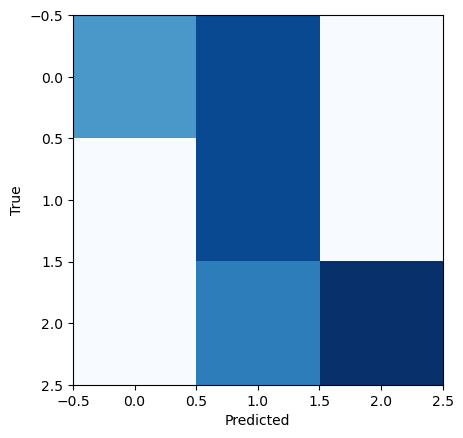

In [27]:
# Naive Bayes Classifier with top 9 features

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(df_top_9.drop('labels', axis=1), df_top_9['labels'], test_size=0.2, random_state=42)

# Train the model
model_9 = GaussianNB()
fit_model_9 = model_9.fit(X_train_9, y_train_9)

# Predict the labels
y_pred_9 = fit_model_9.predict(X_test_9)

# Use confusion matrix to evaluate the model
conf_matrix_9 = confusion_matrix(y_test_9, y_pred_9)
print(conf_matrix_9)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.imshow(conf_matrix_9, cmap='Blues', interpolation='nearest')
plt.show()

In [28]:
# Form a new dataset with 6 most correlated features to each class, total of 18 features

# get top 6 list of features from each class
top_6_class_0 = corr_class_0_abs_sorted.head(7).index.tolist()
top_6_class_1 = corr_class_1_abs_sorted.head(7).index.tolist()
top_6_class_2 = corr_class_2_abs_sorted.head(7).index.tolist()

top_6_class_0.remove('labels')
top_6_class_1.remove('labels')
top_6_class_2.remove('labels')

# combine all 3 lists
top_18_features = top_6_class_0 + top_6_class_1 + top_6_class_2 + ['labels']

# remove duplicates
top_18_features = list(dict.fromkeys(top_18_features))

# create new dataset with top 18 features
df_top_18 = df[top_18_features]

df_top_18.tail()

,pixels_40,pixels_41,pixels_42,pixels_60,pixels_58,pixels_59,pixels_50,pixels_49,pixels_51,pixels_38,pixels_69,pixels_67,pixels_68,pixels_44,labels
199,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


[[15  0  0]
 [ 7  2  0]
 [ 0  7 10]]


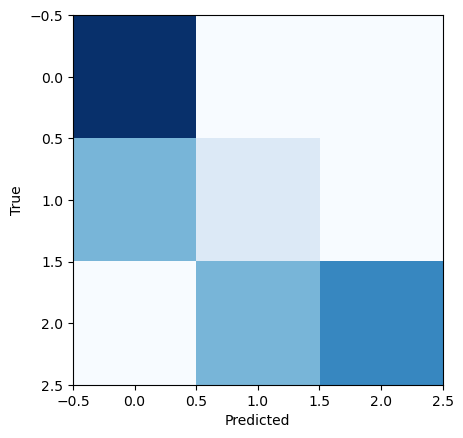

In [29]:
# Naive Bayes Classifier with top 18 features

X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(df_top_18.drop('labels', axis=1), df_top_18['labels'], test_size=0.2, random_state=42)

# Train the model
model_18 = GaussianNB()
fit_model_18 = model_18.fit(X_train_18, y_train_18)

# Predict the labels
y_pred_18 = fit_model_18.predict(X_test_18)

# Use confusion matrix to evaluate the model
conf_matrix_18 = confusion_matrix(y_test_18, y_pred_18)
print(conf_matrix_18)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.imshow(conf_matrix_18, cmap='Blues', interpolation='nearest')
plt.show()

In [30]:
# Plot single image

# plt.figure(figsize=(9, 9))
# # plt.subplot(1, 1, 1)
# # plt.xticks([])
# # plt.yticks([])
# # plt.grid(True)

# plt.imshow(X[24].reshape(9, 9), cmap=plt.cm.binary)
# plt.xlabel(y[24])
# plt.show()


# Part 2: Clustering

In [31]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# X_train.shape
# X_train to numpy array
X_train_np = X_train.to_numpy()

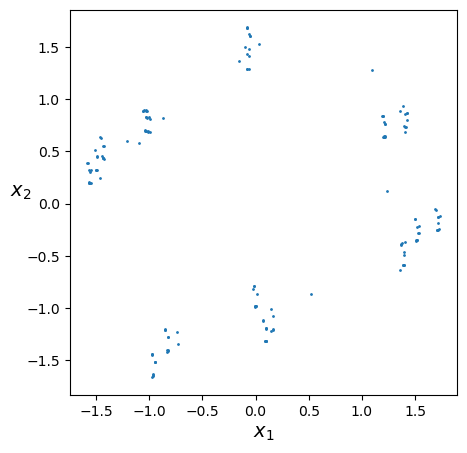

In [102]:
# Apply PCA to reduce the dimensionality of the dataset to 2 dimensions for visualisation

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_train_np)

X2D.shape

# Plot the clusters

plt.figure(figsize=(5, 5))
plot_clusters(X2D)
plt.show()

In [33]:
# CLUSTERING

# K-Means Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= len(np.unique(y_test)),random_state=42)

# Fit the kmeans object with the feature matrix df
# kmeans.fit(df.drop('labels', axis=1))
y_pred_clusters = kmeans.fit_predict(X_train)

X_train_np.shape


/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(163, 81)

In [34]:
y_pred_clusters

array([2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 0, 1, 0], dtype=int32)

In [35]:
def retrieve_info(cluster_labels,y_train):
    #  ‘’’
    #  Associates most probable label with each cluster in KMeans model
    #  returns: dictionary of clusters assigned to each label
    # ‘’’
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

reference_labels = retrieve_info(kmeans.labels_,y_train)
print("Cluster -> Target Dictionary",reference_labels)
# print(y_train)

# Predicting the labels
y_pred = np.vectorize(reference_labels.get)(kmeans.labels_)
print(y_pred)



# y_pred_text = np.vectorize(text_target_dict.get)(y_pred)
# print(y_pred_text)

Cluster -> Target Dictionary {0: 1, 1: 2, 2: 0}
[0 1 2 1 1 2 1 2 0 2 1 2 2 2 1 1 2 0 2 2 2 1 1 2 1 0 2 2 0 2 1 0 1 2 1 0 1
 2 1 0 2 1 0 1 1 2 2 2 2 0 2 1 1 1 1 0 1 2 1 1 2 1 2 2 1 1 1 0 0 1 2 2 0 2
 2 1 1 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 0 1 0 2 2 2 2 0 1 1 2 0 1 2 1 2 2 2
 2 0 1 2 1 2 1 2 0 2 2 1 1 1 1 0 0 2 1 1 1 1 1 2 2 1 1 0 0 2 2 1 2 0 2 0 2
 1 1 1 2 2 0 1 2 0 2 2 2 1 2 1]


cluster 0 -> label 1 -> Neutral
62 elements


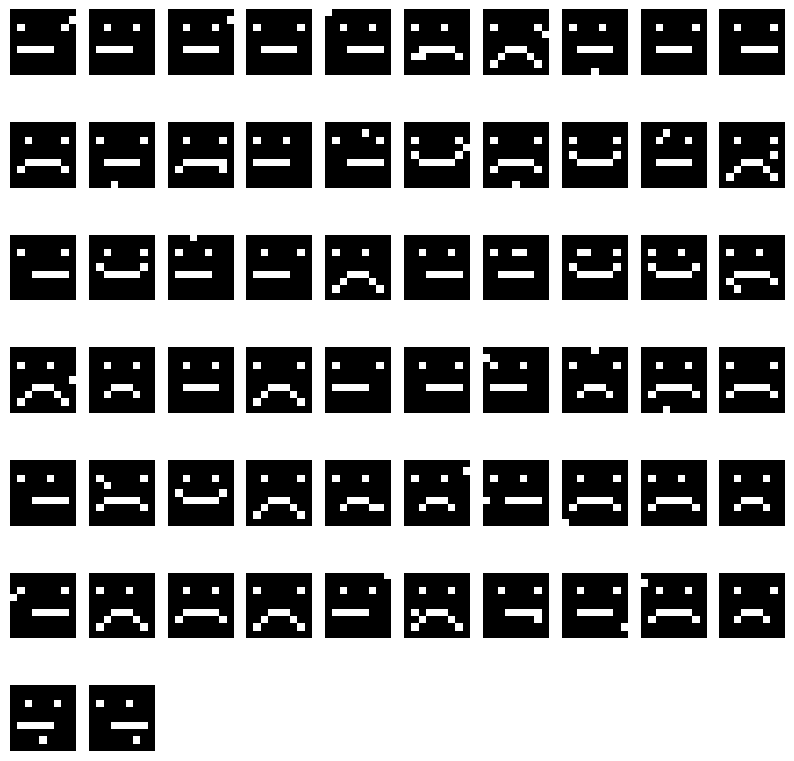

cluster 1 -> label 2 -> Happy
71 elements


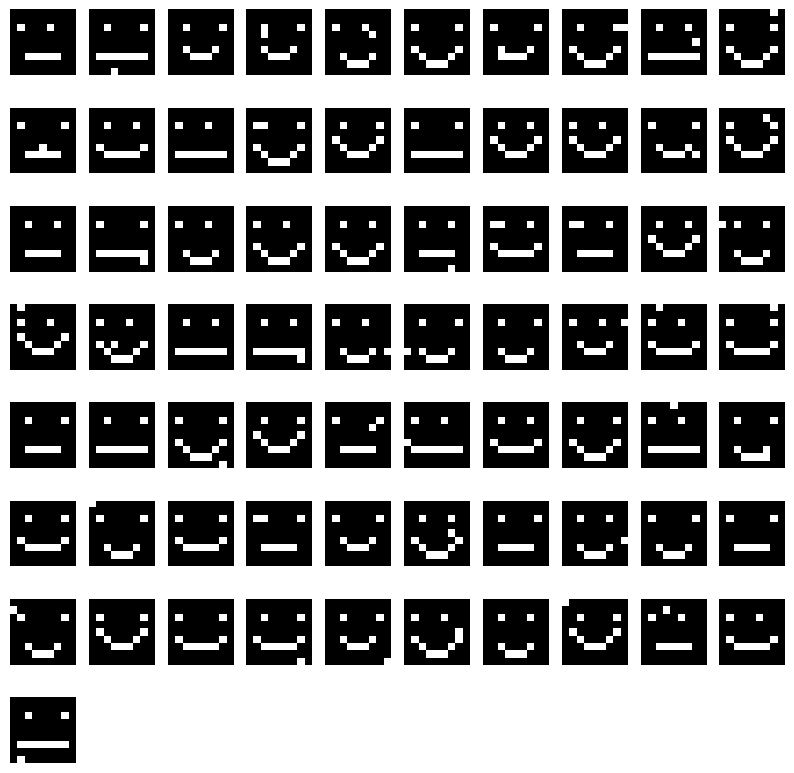

cluster 2 -> label 0 -> Sad
30 elements


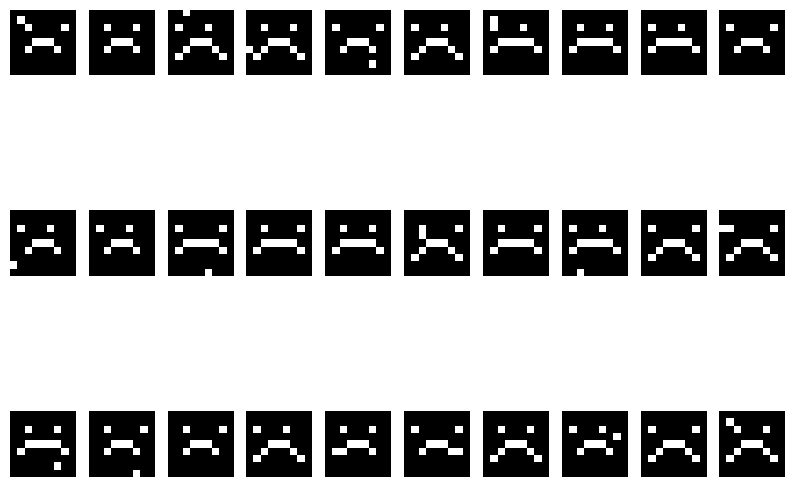

In [36]:
text_target_dict = {0: 'Sad', 1: 'Neutral', 2: 'Happy'}

for i in range(0,3):

    row = np.where(y_pred_clusters==i)[0]       # row in Z for elements of cluster i
    num = row.shape[0]            #  number of elements for each cluster
    r = int(np.floor(num/10.))    # number of rows in the figure of the cluster 

    print("cluster "+str(i)+" -> label "+str(reference_labels[i])+" -> "+text_target_dict[reference_labels[i]])
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = X_train_np[row[k],:]
        image = image.reshape(9, 9)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [37]:
# y_pred is the cluster for each instance
y_pred_clusters is kmeans.labels_

True

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.6625766871165644


In [39]:
kmeans.cluster_centers_

array([[ 1.61290323e-02, -5.20417043e-18, -1.04083409e-17,
         1.61290323e-02,  1.61290323e-02,  0.00000000e+00,
         0.00000000e+00, -1.04083409e-17,  1.61290323e-02,
         3.22580645e-02,  1.04083409e-17,  0.00000000e+00,
         1.61290323e-02,  0.00000000e+00,  1.61290323e-02,
        -5.20417043e-18,  0.00000000e+00,  4.83870968e-02,
        -1.04083409e-17,  5.32258065e-01,  4.67741935e-01,
         1.61290323e-02,  1.61290323e-02,  2.74193548e-01,
         2.41935484e-01,  4.83870968e-01, -1.04083409e-17,
         1.61290323e-02,  0.00000000e+00,  1.61290323e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.04083409e-17, -5.20417043e-18,  3.22580645e-02,
         0.00000000e+00,  9.67741935e-02, -2.08166817e-17,
         1.11022302e-16,  1.11022302e-16,  1.11022302e-16,
        -6.24500451e-17,  1.12903226e-01,  1.61290323e-02,
         1.61290323e-02,  1.61290323e-01,  5.80645161e-01,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+0

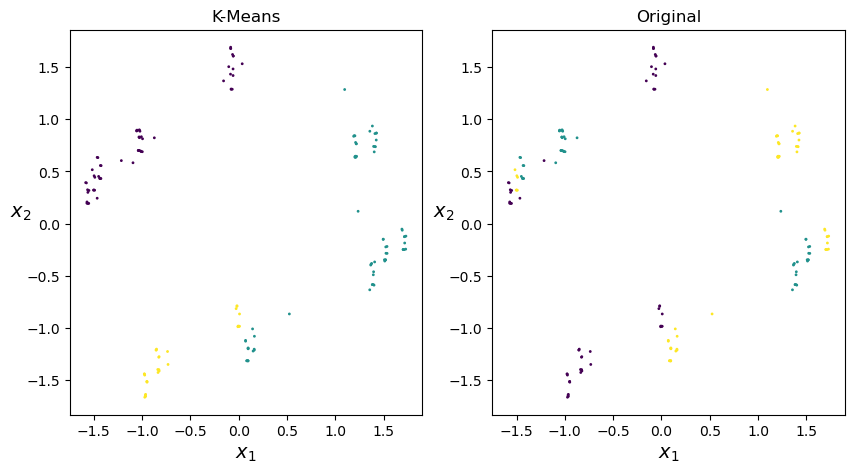

In [40]:
# Apply PCA to reduce the dimensionality of the dataset to 2 dimensions for visualisation

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_train_np)

X2D.shape

# Plot the clusters side by side for y_pred_clusters and y_train

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('K-Means')
plot_clusters(X2D, y_pred_clusters)

plt.subplot(1, 2, 2)
plt.title('Original')
plot_clusters(X2D, y_train)

plt.show()



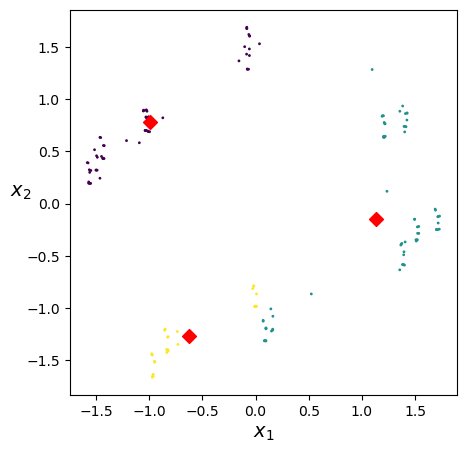

In [41]:
# Convert centroids to 2D using PCA

centroids2D = pca.transform(kmeans.cluster_centers_)

# Plot the centroids and the clusters

plt.figure(figsize=(5, 5))
plot_clusters(X2D, y_pred_clusters)
plt.scatter(centroids2D[:, 0], centroids2D[:, 1], c='red', s=50, marker='D')
plt.show()

In [42]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


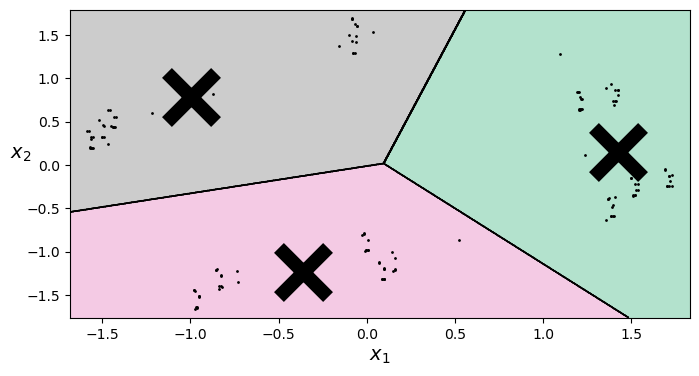

In [43]:
# Transform kmens to 2D using PCA
kmeans_reduced = KMeans(n_clusters=3, random_state=0).fit(X2D)

# Plot the decision boundaries

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_reduced, X2D)
plt.show()

In [44]:
# EM Clustering

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
y_pred_clusters_gaus = gm.fit_predict(X_train_np)


# Part 3. Supervised Learning: Generalisation & Overfitting; Decision trees

In [45]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a DecisionTreeClassifier object with random_state=42
tree_clf = DecisionTreeClassifier()

# Fit the tree_clf object with the feature matrix df
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier()

[Text(0.5769230769230769, 0.9285714285714286, 'x[39] <= 0.5\ngini = 0.666\nsamples = 163\nvalue = [57, 51, 55]'),
 Text(0.5, 0.7857142857142857, 'x[49] <= 0.5\ngini = 0.641\nsamples = 133\nvalue = [27, 51, 55]'),
 Text(0.3076923076923077, 0.6428571428571429, 'x[55] <= 0.5\ngini = 0.42\nsamples = 70\nvalue = [0, 21, 49]'),
 Text(0.23076923076923078, 0.5, 'x[67] <= 0.5\ngini = 0.282\nsamples = 59\nvalue = [0, 10, 49]'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[60] <= 0.5\ngini = 0.401\nsamples = 36\nvalue = [0, 10, 26]'),
 Text(0.07692307692307693, 0.21428571428571427, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16]'),
 Text(0.23076923076923078, 0.21428571428571427, 'x[46] <= 0.5\ngini = 0.5\nsamples = 20\nvalue = [0, 10, 10]'),
 Text(0.15384615384615385, 0.07142857142857142, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.3076923076923077, 0.07142857142857142, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsa

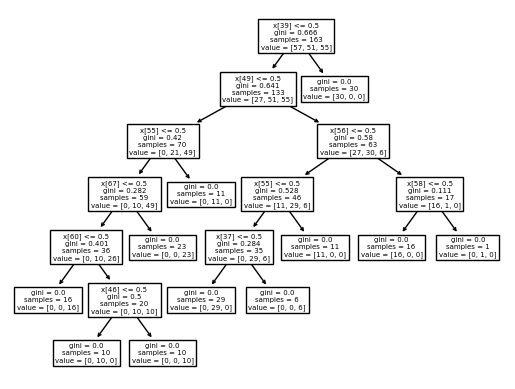

In [46]:
plot_tree(tree_clf)

/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

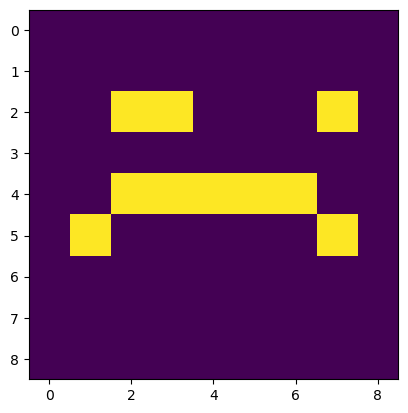

In [47]:
X_test_np = X_test.to_numpy()

plt.imshow(X_test_np[2].reshape(9, 9))

tree_clf.predict(X_test_np[2].reshape(1, -1))

In [48]:

# Measure accuracy
# Predict the labels
y_pred = tree_clf.predict(X_train)

print(accuracy_score(y_train, y_pred))

1.0


In [49]:
# Measure accuracy using 10-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, X_train, y_train, cv=10)
print('Accuracy for each fold: ', scores)
print('Mean Accuracy: ', scores.mean())

Accuracy for each fold:  [1.         1.         0.94117647 1.         1.         1.
 1.         1.         0.9375     1.        ]
Mean Accuracy:  0.9878676470588236


In [50]:
# Measure accuracy using test set

from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))



0.975609756097561


In [51]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        17

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



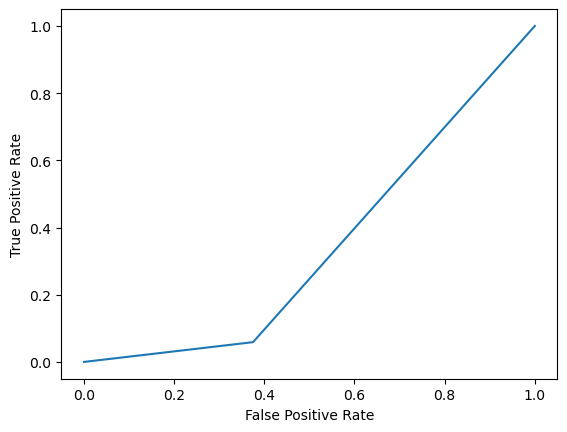

In [52]:
# ROC Curve

from sklearn.metrics import roc_curve

y_pred_proba = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

# Train a DecisionTreeClassifier with the best parameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Calculate accuracy on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)

# Calculate classification report for precision, recall, f1-score and support
report_best = classification_report(y_test, y_pred_best)

# best_params, best_score, accuracy_best, report_best

print(best_params)
print(best_score)
print(accuracy_best)
print(report_best)


{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.9819852941176471
0.975609756097561
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        17

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



In [54]:
# Investigating Overfitting

# Function to train a model, predict and calculate metrics
def train_predict_evaluate(X_train, X_test, y_train, y_test):
    # Train a DecisionTreeClassifier with the best parameters
    clf = DecisionTreeClassifier(random_state=42, **best_params)
    clf.fit(X_train, y_train)

    # Use the model to make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_pred)

    # Use the model to make predictions on the training set
    y_pred_train = clf.predict(X_train)

    # Calculate accuracy on the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)

    return accuracy_train, accuracy_test

# Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set
X_train_30, X_test_30, Y_train_30, Y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
accuracy_train_30, accuracy_test_30 = train_predict_evaluate(X_train_30, X_test_30, Y_train_30, Y_test_30)

# Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set
X_train_60, X_test_60, Y_train_60, Y_test_60 = train_test_split(X, y, test_size=0.6, random_state=42)
accuracy_train_60, accuracy_test_60 = train_predict_evaluate(X_train_60, X_test_60, Y_train_60, Y_test_60)

(accuracy_train_30, accuracy_test_30), (accuracy_train_60, accuracy_test_60)


((1.0, 0.9516129032258065), (1.0, 0.8943089430894309))

In [55]:
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Function to train a model, predict and calculate metrics
def train_predict_evaluate_rf(X_train, X_test, y_train, y_test):
    # Train a RandomForestClassifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Use the model to make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_pred)

    # Use the model to make predictions on the training set
    y_pred_train = clf.predict(X_train)

    # Calculate accuracy on the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)

    return accuracy_train, accuracy_test

# Train and evaluate on the original training set
accuracy_train_rf, accuracy_test_rf = train_predict_evaluate_rf(X_train, X_test, y_train, y_test)

# Train and evaluate on the new training set with 30% of the instances moved to the test set
accuracy_train_rf_30, accuracy_test_rf_30 = train_predict_evaluate_rf(X_train_30, X_test_30, Y_train_30, Y_test_30)

# Train and evaluate on the new training set with 60% of the instances moved to the test set
accuracy_train_rf_60, accuracy_test_rf_60 = train_predict_evaluate_rf(X_train_60, X_test_60, Y_train_60, Y_test_60)

(accuracy_train_rf, accuracy_test_rf), (accuracy_train_rf_30, accuracy_test_rf_30), (accuracy_train_rf_60, accuracy_test_rf_60)

((1.0, 1.0), (1.0, 1.0), (1.0, 1.0))

# Part 4. Neural Networks and Convolutional Neural Networks

In [56]:
# Linear Classifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Create a Logistic Regression model
model = LogisticRegression()

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Train the model on the full training set
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

cv_scores.mean(), test_accuracy


(0.9875, 1.0)

In [57]:
# Multi-layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier

def train_and_evaluate_mlp(activation, hidden_layer_sizes, learning_rate, max_iter, momentum):
    # Create the MLP classifier
    mlp = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer_sizes, 
                        learning_rate_init=learning_rate, max_iter=max_iter, momentum=momentum, 
                        random_state=42)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    # Evaluate the model on the training data
    train_score = mlp.score(X_train, y_train)

    # Evaluate the model on the test data
    test_score = mlp.score(X_test, y_test)

    return train_score, test_score

# Define the parameter values we want to try
activations = ['relu', 'tanh', 'logistic']
hidden_layer_sizes = [(10,), (20,), (30,), (10, 10), (20, 20)]
learning_rates = [0.001, 0.01, 0.1]
max_iters = [200, 300, 400]
momentums = [0.1, 0.5, 0.9]

# Store the results in a list
results = []

# Loop over all combinations of parameters
for activation in activations:
    for hidden_layer_size in hidden_layer_sizes:
        for learning_rate in learning_rates:
            for max_iter in max_iters:
                for momentum in momentums:
                    # Train and evaluate the MLP
                    train_score, test_score = train_and_evaluate_mlp(activation, hidden_layer_size, learning_rate, max_iter, momentum)

                    # Store the results
                    results.append({
                        'activation': activation,
                        'hidden_layer_size': hidden_layer_size,
                        'learning_rate': learning_rate,
                        'max_iter': max_iter,
                        'momentum': momentum,
                        'train_score': train_score,
                        'test_score': test_score,
                    })

/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/laurentjuma/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the 

In [58]:
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
results_df.sort_values(by='test_score', ascending=False)

,activation,hidden_layer_size,learning_rate,max_iter,momentum,train_score,test_score
202,tanh,"(30,)",0.010,300,0.5,1.000000,1.000000
251,tanh,"(20, 20)",0.001,400,0.9,1.000000,1.000000
249,tanh,"(20, 20)",0.001,400,0.1,1.000000,1.000000
248,tanh,"(20, 20)",0.001,300,0.9,1.000000,1.000000
247,tanh,"(20, 20)",0.001,300,0.5,1.000000,1.000000
246,tanh,"(20, 20)",0.001,300,0.1,1.000000,1.000000
245,tanh,"(20, 20)",0.001,200,0.9,1.000000,1.000000
244,tanh,"(20, 20)",0.001,200,0.5,1.000000,1.000000
243,tanh,"(20, 20)",0.001,200,0.1,1.000000,1.000000
242,tanh,"(10, 10)",0.100,400,0.9,1.000000,1.000000


In [87]:
# CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create new training and test sets, and validation

X_train_cnn = X_train.to_numpy().reshape(X_train.shape[0], 9, 9, 1)
X_test_cnn = X_test.to_numpy().reshape(X_test.shape[0], 9, 9, 1)

def train_model(conv_layers, dense_layers, optimizer=Adam(), epochs=10):
    # Create the model
    model = Sequential()
    
    # Add Convolutional layers
    for i, conv_layer in enumerate(conv_layers):
        if i == 0:
            model.add(Conv2D(conv_layer['filters'], kernel_size=conv_layer['kernel_size'], 
                             activation=conv_layer['activation'], input_shape=(9, 9, 1)))
        else:
            model.add(Conv2D(conv_layer['filters'], kernel_size=conv_layer['kernel_size'], 
                             activation=conv_layer['activation']))
        model.add(MaxPooling2D(pool_size=conv_layer['pool_size']))
    
    model.add(Flatten())
    
    # Add Dense layers
    for dense_layer in dense_layers:
        model.add(Dense(dense_layer['nodes'], activation=dense_layer['activation']))
    
    model.add(Dense(3, activation='softmax'))  # Output layer

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_cnn, y_train, epochs=epochs,
                        #  validation_data=(X_test_cnn, y_test),
                         validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)

    print(f"Test Accuracy: {test_accuracy}")

    return history



In [88]:
conv_layers = [
    {'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu', 'pool_size': (2, 2)},
    {'filters': 64, 'kernel_size': (3, 3), 'activation': 'relu', 'pool_size': (1, 1)}
]

dense_layers = [
    {'nodes': 64, 'activation': 'relu'},
    {'nodes': 128, 'activation': 'relu'}
]

history = train_model(conv_layers, dense_layers, optimizer=Adam(), epochs=20)

Epoch 1/20


2023-07-27 17:38:42.282433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-27 17:38:42.333003: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


5/5 [==============================] - ETA: 0s - loss: 1.1029 - accuracy: 0.3385

2023-07-27 17:38:43.077181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 314ms/step - loss: 1.1029 - accuracy: 0.3385 - val_loss: 1.0463 - val_accuracy: 0.4848
Epoch 2/20
5/5 [==============================] - 0s 18ms/step - loss: 1.0421 - accuracy: 0.6385 - val_loss: 0.9957 - val_accuracy: 0.7273
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.9993 - accuracy: 0.6385 - val_loss: 0.9626 - val_accuracy: 0.7879
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.9532 - accuracy: 0.7154 - val_loss: 0.9007 - val_accuracy: 0.7576
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.8744 - accuracy: 0.8231 - val_loss: 0.7826 - val_accuracy: 0.8182
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 0.7655 - accuracy: 0.7308 - val_loss: 0.6730 - val_accuracy: 0.8485
Epoch 7/20
5/5 [==============================] - 0s 22ms/step - loss: 0.6618 - accuracy: 0.8462 - val_loss: 0.5594 - val_accuracy: 0.8788
Epoch 8/20
5/5 [=====================

In [84]:
history.history

{'loss': [1.080532193183899,
  1.0147058963775635,
  0.9321396946907043,
  0.826045036315918,
  0.6898728609085083,
  0.5555019974708557,
  0.4350928068161011,
  0.33352553844451904,
  0.2295682281255722,
  0.14660678803920746,
  0.11480400711297989,
  0.06477474421262741,
  0.04833337664604187,
  0.026012461632490158,
  0.019191095605492592,
  0.01237871777266264,
  0.011122141033411026,
  0.0089576980099082,
  0.006610552780330181,
  0.005389862693846226],
 'accuracy': [0.5766870975494385,
  0.6441717743873596,
  0.650306761264801,
  0.7791411280632019,
  0.7484662532806396,
  0.6809815764427185,
  0.907975435256958,
  0.9693251252174377,
  1.0,
  1.0,
  0.9754601120948792,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.0295499563217163,
  0.9675341248512268,
  0.9082510471343994,
  0.8305745124816895,
  0.692940354347229,
  0.6199739575386047,
  0.4522715210914612,
  0.30308979749679565,
  0.2303217500448227,
  0.14697377383708954,
  0.10870298743247

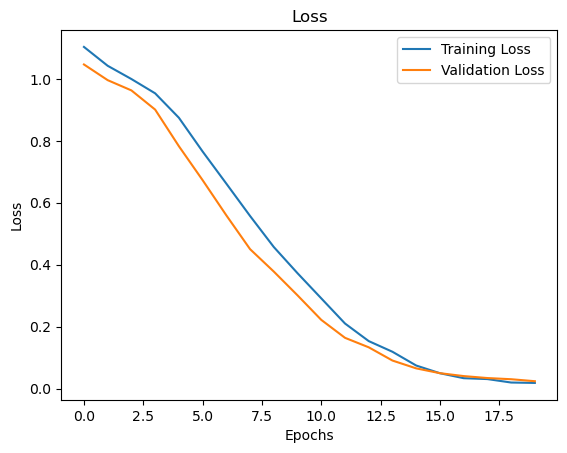

In [89]:
figure = plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


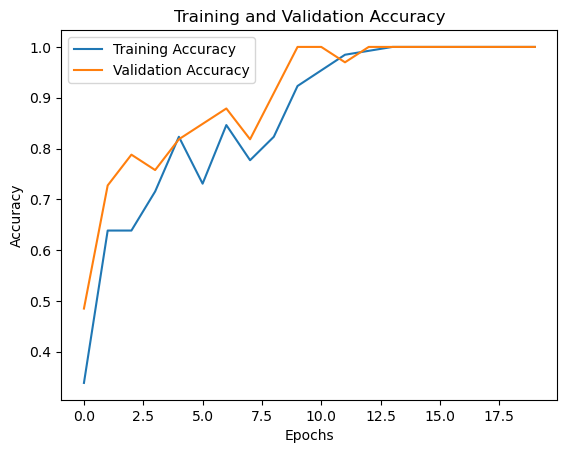

In [91]:
figure = plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
